### Visualização de dados com Plotly

Plotly é uma biblioteca de visualização de dados do Python, que permite a criação e publicação de gráficos interativos, com alta qualidade.

<p align="center">
  <img width="55%" src="https://upload.wikimedia.org/wikipedia/commons/3/37/Plotly-logo-01-square.png" alt="Plotly"height=400px >
</p>

O Plotly é um projeto open-source que suporta mais de 40 tipos de gráficos, e abrange desde o mais simples gráficos de linhas, até mapas interativos, os gráficos podem ser incorporados ao jupyter notebook, ou páginas HTML.

Participando de um projeto prático, simulando uma empresa real, tive a necessidade de criarmos um Dashboard para apresentação de algumas analises feita durante o projeto, pela facilidade e disponibilidade, foi criados alguns insights usando a ferramenta `Chart-Studio` do Plotly.

### Instalado os pacotes no jupyter

In [148]:
!pip install cufflinks  # Conectar o Pandas ao Plotly
!pip install plotly
!pip install chart-studio

Nesse notebook vamos mostrar o uso da visualização de dados com Plotly, usando o método `offline`, localmente no Jupyter Notebook.

Para usar o modo online, enviar os gráfico para a cloud do Plotly, e criar os Dashboards, você precisa alterar nos gráficos:

* De ***py.iplot(fig)*** para ***pyo.plot(fig)***
* Configurar suas credenciais de cadastro feito no site do Plotly, para enviar os gráficos via API.

Maiores informações nas documentações disponibilizadas no site do [Plotly](https://plotly.com/)

### Aquisição dos Dados

Os dados utilizado nesse projeto, foi disponibilizado inicialmente na plataforma do [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce), da empresa Olist, é uma statup Brasileira que atua no segmento de e-commerce.

In [4]:
# importando pacotes
import pandas as pd
import chart_studio
import plotly
import cufflinks as cf
import plotly.offline as py
import plotly.graph_objects as go
import chart_studio.plotly as pyo

# importando plotly modo online
chart_studio.tools.set_credentials_file(username='username', api_key='xxxxxxxxxxxxxx')

# habilitar modo offline do plotly
cf.go_offline()

# carregar dataset
DATA_FILE_OLIST = 'df_olist_dataset.csv'
df_olist_dataset = pd.read_csv(DATA_FILE_OLIST)

# lendo dataframe
df_olist_dataset.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,...,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,9350,maua,SP
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-18 14:44:43,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,9350,maua,SP
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-07 18:30:01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,...,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,9350,maua,SP


Para que os gráficos sejam gerados dentro do Jupyter Notebook (localmente), precisamos habilitar o modo offline.

In [5]:
# habilita o modo offline
plotly.offline.init_notebook_mode(connected=True)

Converter as variáveis de data para o formato datetime, para ajudar na visualização dos dados.

In [6]:
# conveter colunas data para formato datetime
df_olist_dataset['order_purchase_timestamp'] = pd.to_datetime(df_olist_dataset['order_purchase_timestamp'])
df_olist_dataset['order_delivered_customer_date'] = pd.to_datetime(df_olist_dataset['order_delivered_customer_date'])

In [7]:
# filtrar status concluido
df_olist_dataset_delivered = df_olist_dataset[df_olist_dataset['order_status'] == 'delivered']

In [8]:
# criar uma coluna mes de compra e ano de compra
df_olist_dataset_delivered['mes_compra'] = df_olist_dataset_delivered.order_purchase_timestamp.dt.to_period('M').astype(str)
df_olist_dataset_delivered['ano_compra'] = df_olist_dataset_delivered.order_purchase_timestamp.dt.to_period('Y').astype(str)

In [9]:
# criar uma variavel que recebe valores mensais de compras
vendas_por_mes = df_olist_dataset_delivered.groupby(by='mes_compra').payment_value.sum()

Criar um gráfico de barras, filtro o número de pedidos feito em cada mês.

In [10]:
# numero de pedidos por mes
pedidos_por_mes = df_olist_dataset_delivered.groupby(df_olist_dataset_delivered['mes_compra']).agg({'order_id' : 'nunique'})

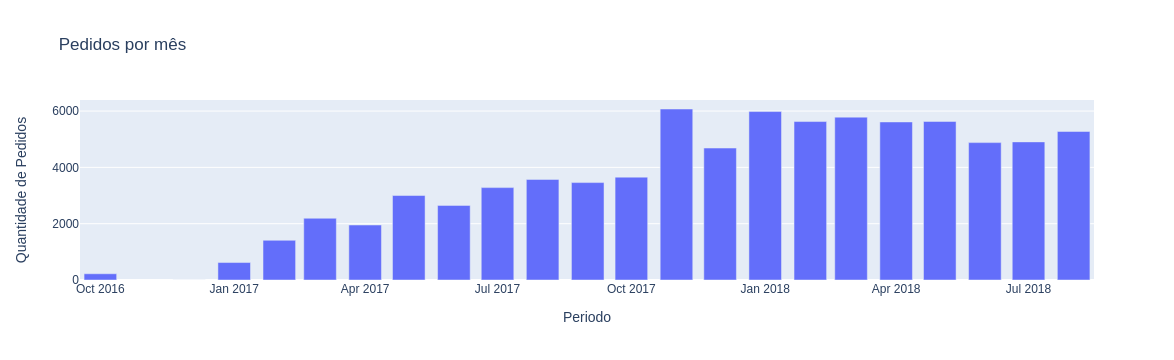

In [11]:
# criar um gráfico de pedidos feitos por mes
data = [go.Bar(x=pedidos_por_mes.index,
              y=pedidos_por_mes.order_id)]

# layout
config_layout = go.Layout(title='Pedidos por mês',
                         yaxis={'title':'Quantidade de Pedidos'},
                         xaxis={'title':'Periodo'})

# figura
fig = go.Figure(data=data, layout=config_layout)

# plot grafico
py.iplot(fig)

Mesmo gráfico de barras, agora filtrando os valores de vendas por mês, vamos calcular a média e o valor máximo, se a vendas ficar a baixo da média, a barra fica em vermelho, se manter a cima da média, fica em azul, e destacando o mês que teve o maior valor de vendas, destacando com a cor verde.

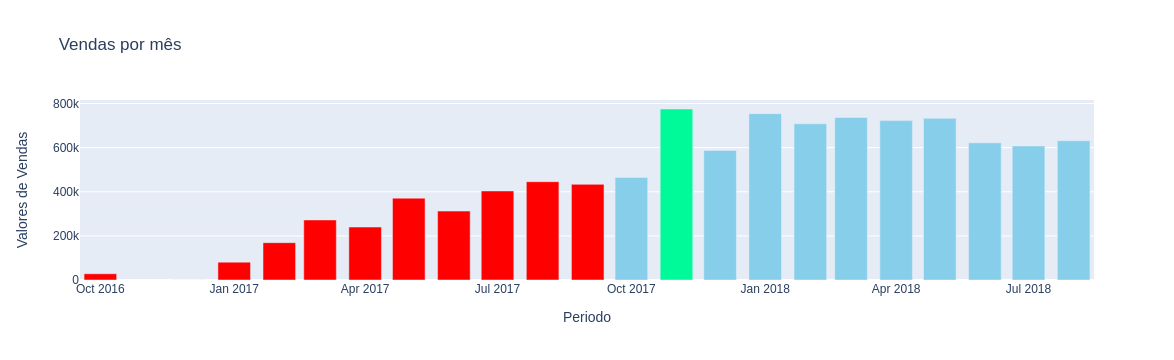

In [13]:
# criar um grafico destacando as barras que estao a baixo da media, ou o mes que mais vendeu
cores = []
media_vendas = vendas_por_mes.values.mean()
maximo_vendas = vendas_por_mes.values.max()

# se o valor da media for menor que a media, destacar
for x in vendas_por_mes.values:
    if x < media_vendas:
        cores.append('red')
    elif x == maximo_vendas:
                cores.append('#00FA9A')
    else:
        cores.append('#87CEEB')

data = [go.Bar(x=vendas_por_mes.index,
                  y=vendas_por_mes.values,
                  marker = {'color':cores})]

# layout
config_layout = go.Layout(title='Vendas por mês',
                         yaxis={'title':'Valores de Vendas'},
                         xaxis={'title':'Periodo'})

# figura
fig = go.Figure(data=data, layout=config_layout)

# plot grafico
py.iplot(fig)

Gráfico que filtra as vendas por ano, destacando com a cor verde, o ano com amior valor de vendas.

In [20]:
# criar uma variavel que recebe valor vendas por ano
vendas_por_ano = df_olist_dataset_delivered.groupby(by='ano_compra').payment_value.sum()

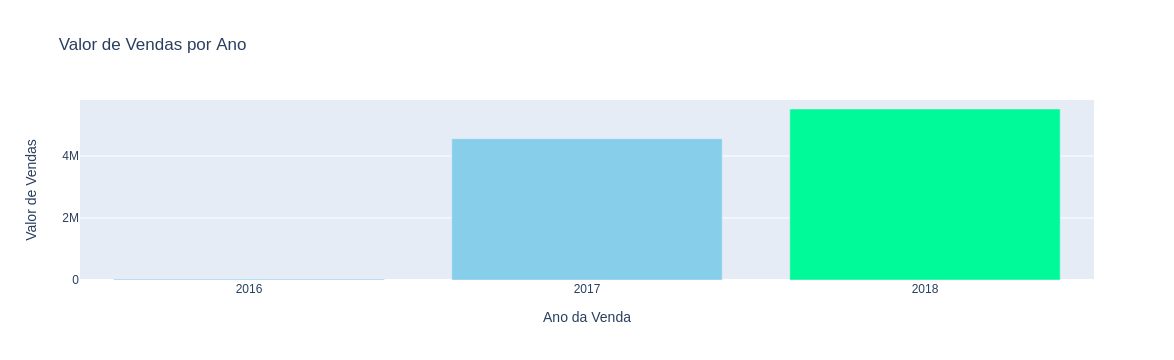

In [21]:
# grafico que mostra o ano que mais teve vendas
cores2 = []
maximo_vendas_ano = vendas_por_ano.values.max()

# valor maximo
for x in vendas_por_ano.values:
    if x == maximo_vendas_ano:
        cores2.append('#00FA9A')
    else:
        cores2.append('#87CEEB')

# vendas por ano
data = [go.Bar(x = vendas_por_ano.index,
              y = vendas_por_ano.values,
              marker = {'color':cores2})]

# layout
config_layout = go.Layout(title='Valor de Vendas por Ano',
                         yaxis={'title':'Valor de Vendas'},
                         xaxis={'title':'Ano da Venda'})

# figura
fig = go.Figure(data=data, layout=config_layout)

py.iplot(fig)

Um gráfico de linhas, mostrando a evolução de número de pedidos por ano.

In [15]:
# variavel que recebe quantidade de pedios por ano
quantidade_por_ano = df_olist_dataset_delivered.groupby('ano_compra')['order_id'].count()

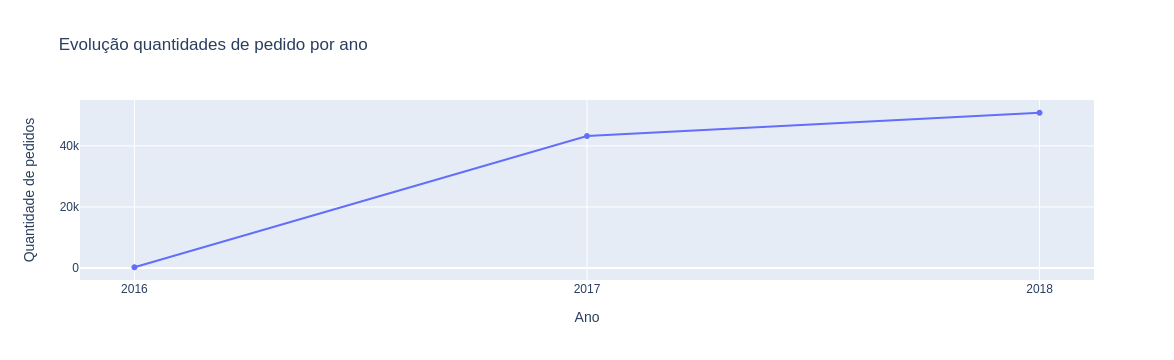

In [16]:
# grafico evolucao pedidos por ano
data = [go.Scatter(x = quantidade_por_ano.index,
               y = quantidade_por_ano.values)]
        
config_layout = go.Layout(title='Evolução quantidades de pedido por ano',
                         xaxis={'title':'Ano'},
                         yaxis={'title':'Quantidade de pedidos'})

fig = go.Figure(data=data, layout=config_layout)

py.iplot(fig)

Dois gráfico que mostra a distribuição de pedidos por status, e a forma de pagamento escolhida pelos clientes.

In [17]:
# criandos variaveis para filtro status do pedido e forma de pagamento escolhida
pedidos_por_status = df_olist_dataset.order_status.value_counts()
forma_pagamento = df_olist_dataset.payment_type.value_counts()

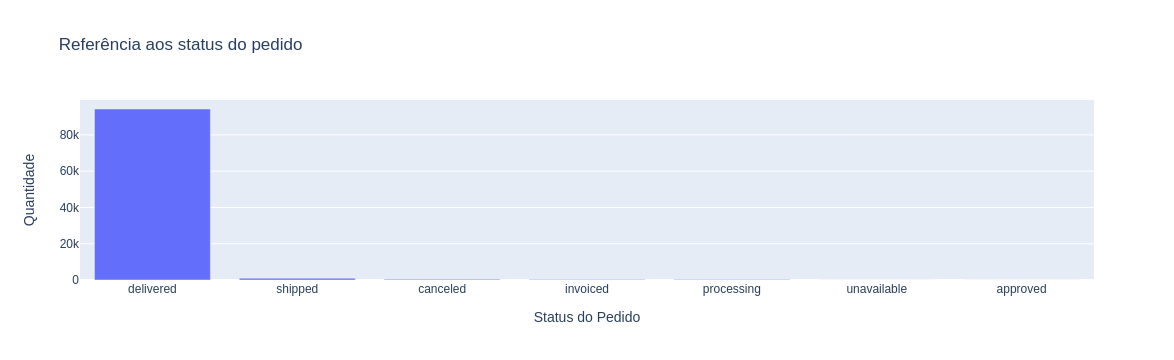

In [18]:
# distribuicao dos status
data = [go.Bar(x=pedidos_por_status.index, y=pedidos_por_status.values)]
config_layout = go.Layout(title="Referência aos status do pedido",
                         yaxis={'title':'Quantidade'},
                         xaxis={'title':"Status do Pedido"})
fig = go.Figure(data=data, layout=config_layout)

py.iplot(fig)

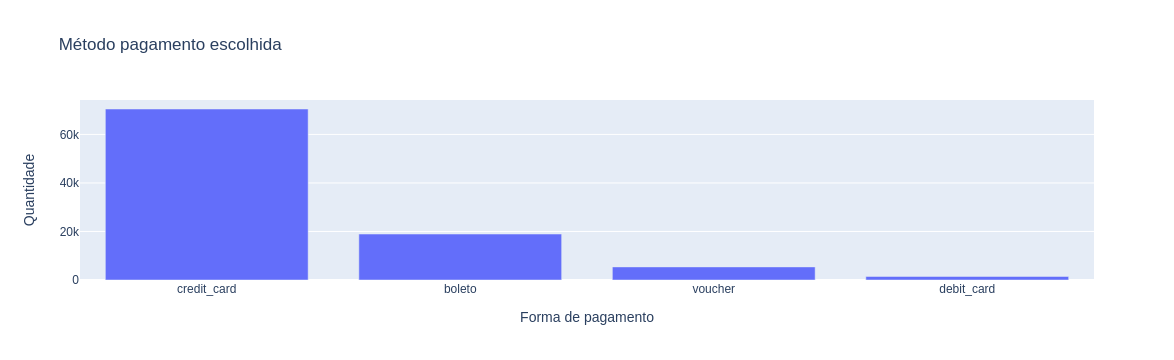

In [19]:
# distribuicao metodo de pagamento
data = [go.Bar(x=forma_pagamento.index, y=forma_pagamento.values)]
config_layout = go.Layout(title="Método pagamento escolhida",
                         yaxis={'title':'Quantidade'},
                         xaxis={'title':"Forma de pagamento "})
fig = go.Figure(data=data, layout=config_layout)

py.iplot(fig)

### Um exemplo de Dashboard criado com a ferramenta Chart-Studio na nuvem do Plotly.

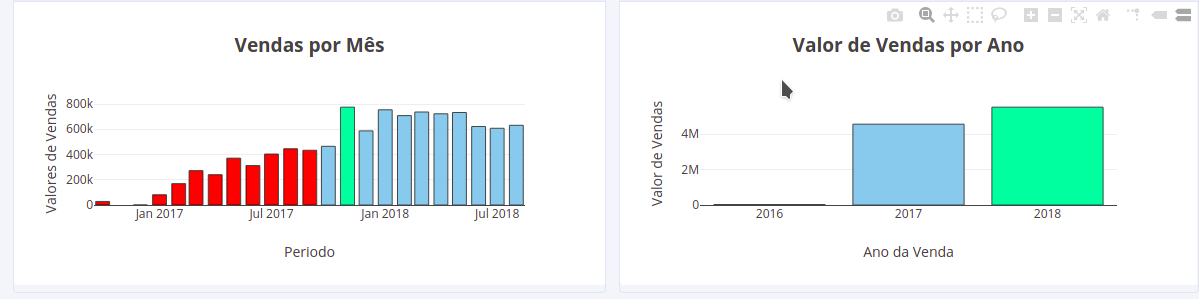

In [25]:
# exibindo imagem
from IPython.display import Image
Image(filename='imagem01-plotly.png',width=1000, height=400)